In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
benchmark_gg = np.load("../N5K/tests/benchmarks_nl_full_clgg.npz")
ell = benchmark_gg["ls"]

In [3]:
m_CL = np.load('m_CL_F32.npy')
m_CC = np.load('m_CC_F32.npy')
m_LL = np.load('m_LL_F32.npy')

m_CL_fang = np.load('m_CL_fang.npy')
m_CC_fang = np.load('m_CC_fang.npy')
m_LL_fang = np.load('m_LL_fang.npy')

m_CL_limb = np.load('m_CL_limb.npy')
m_CC_limb = np.load('m_CC_limb.npy')
m_LL_limb = np.load('m_LL_limb.npy')

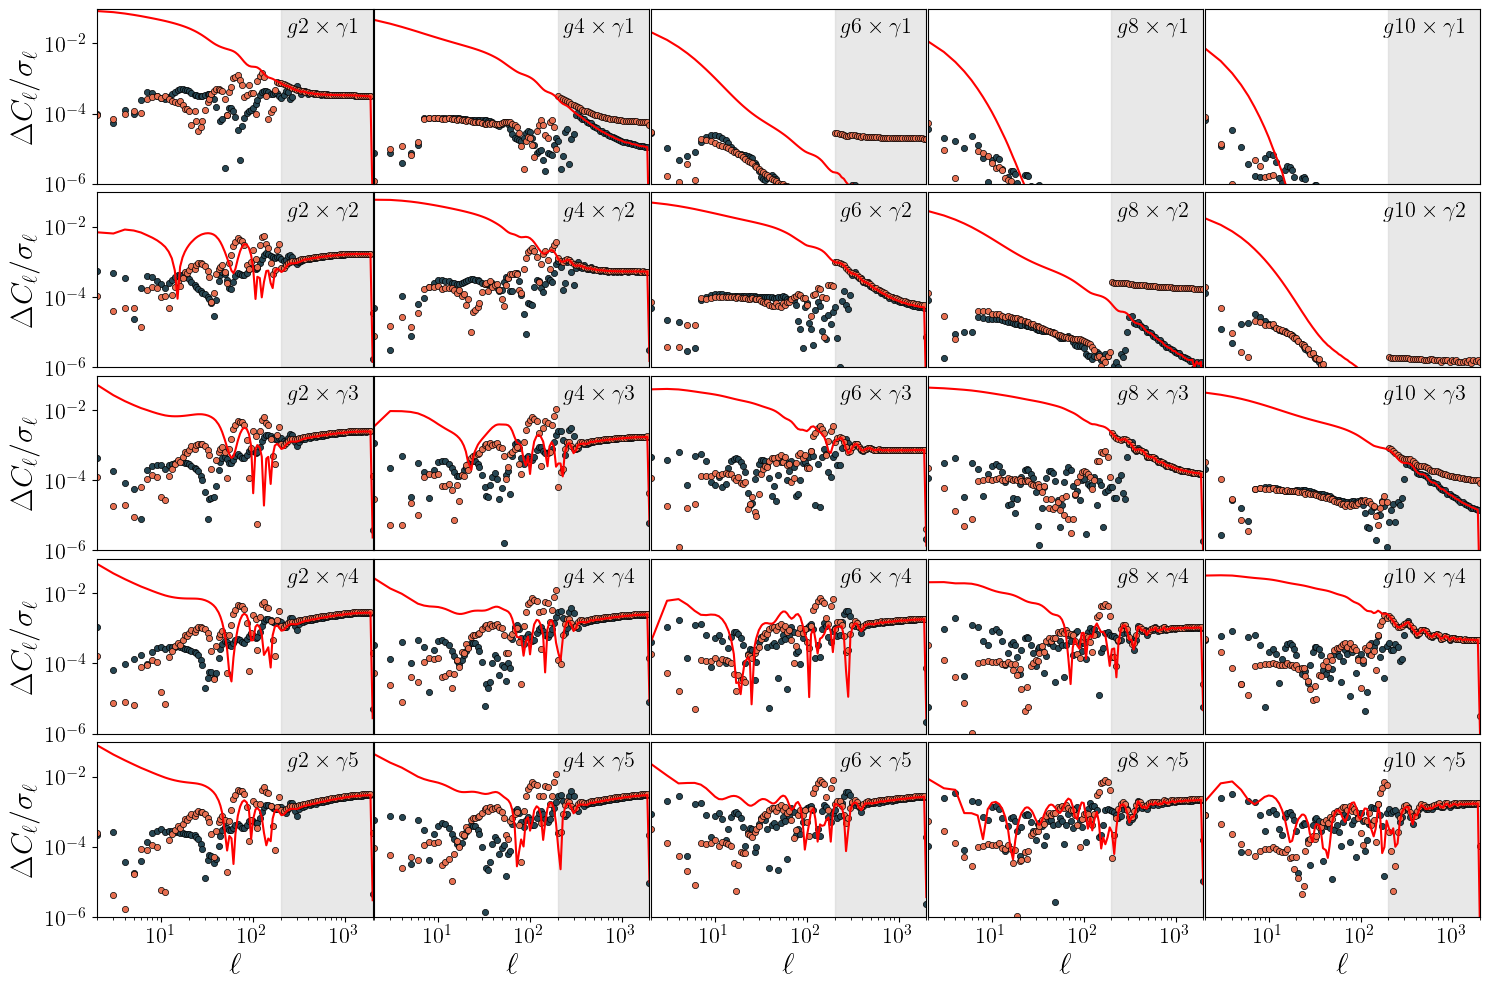

In [4]:
fig, axes = plt.subplots(5, 5, figsize=(15, 10))

# Define the indices for each subplot
indices = [(2, 1), (4, 1), (6, 1), (8, 1), (10, 1),
           (2, 2), (4, 2), (6, 2), (8, 2), (10, 2),
           (2, 3), (4, 3), (6, 3), (8, 3), (10, 3),
           (2, 4), (4, 4), (6, 4), (8, 4), (10, 4),
           (2, 5), (4, 5), (6, 5), (8, 5), (10, 5)]

for i, ax in enumerate(axes.flat):
    idx = indices[i]
    data = m_CL[:, idx[0]-1, idx[1]-1]  # Adjusting index to be 0-based
    data_fang = m_CL_fang[:, idx[0]-1, idx[1]-1]
    data_limb = m_CL_limb[:, idx[0]-1, idx[1]-1]

    # Change background color after x = 200
    ax.axvspan(200, ell.max(), color='lightgrey', alpha=0.5)
    
    ax.scatter(ell, data, color = "#264653",s=20,edgecolors='black',linewidths=0.5)
    ax.scatter(ell, data_fang, color= "#E76F51",s=20,edgecolors='black',linewidths=0.5)
    ax.plot(ell, data_limb, color = "r")
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim((1e-6,9.5e-2))
    ax.set_xlim((2,2000))
    
    # Add text identifying the two bins
    ax.text(0.95, 0.95, fr'$g{idx[0]} \times \gamma{idx[1]}$', transform=ax.transAxes,
            fontsize=16, verticalalignment='top', horizontalalignment='right')
    

    # Only set labels for the leftmost and bottom plots
    if i % 5 == 0:
        ax.set_ylabel(r'$\Delta C_\ell /\sigma_\ell$',fontsize=22)
        ax.tick_params(axis='y', labelsize=16)
    if i >= 20:
        ax.set_xlabel(r'$\ell$',fontsize=22)
        ax.tick_params(axis='x', labelsize=16)

    # Remove ticks and labels for internal plots
    if i % 5 != 0:
        ax.set_yticklabels([])
        ax.get_yaxis().set_visible(False)
    if i < 20:
        ax.set_xticklabels([])
        ax.get_xaxis().set_visible(False)

# Adjust layout for better viewing
plt.tight_layout(h_pad=-0.25, w_pad=-0.25)
plt.savefig("Plots/CL_F32.pdf")
plt.show()

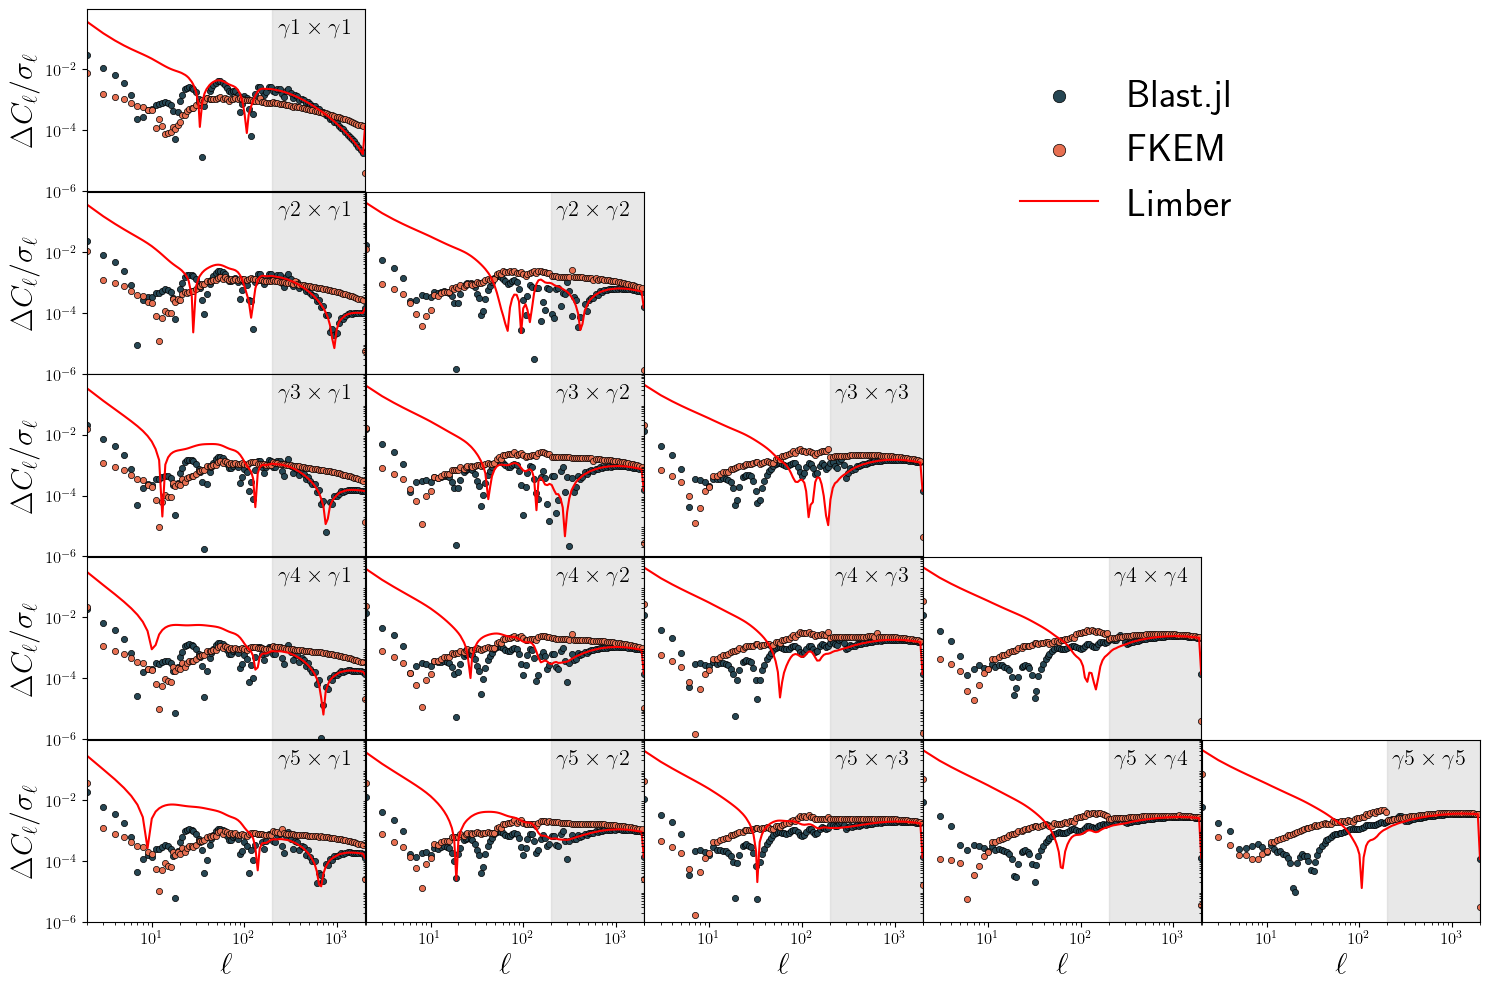

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(15, 10))

for i in range(5):
    for j in range(5):
        if j > i:  # Only plot the lower triangle, including diagonal
            fig.delaxes(axes[i, j])  # Remove the subplot if it's in the upper triangle
            continue
        
        ax = axes[i, j]
        data = m_LL[:, i, j]
        data_fang = m_LL_fang[:, i, j]
        data_limb = m_LL_limb[:, i, j]

        # Change background color after x = 200
        ax.axvspan(200, ell.max(), color='lightgrey', alpha=0.5)

        if i == 0 and j == 0:
            ax.scatter(ell, data, label='Blast.jl', color = "#264653",s=20,edgecolors='black',linewidths=0.5)
            ax.scatter(ell, data_fang, label='FKEM', color= "#E76F51", s=20,edgecolors='black',linewidths=0.5)
            ax.plot(ell, data_limb, color='r', label='Limber')
        else: 
            ax.scatter(ell, data, color = "#264653",s=20,edgecolors='black',linewidths=0.5)
            ax.scatter(ell, data_fang, color= "#E76F51", s=20,edgecolors='black',linewidths=0.5)
            ax.plot(ell, data_limb, color='r')
            

        ax.set_xscale('log')
        ax.set_yscale('log')  # Set the y-axis to log scale
        
        # Set the y-axis limits
        ax.set_ylim((1e-6,9.5e-1))
        ax.set_xlim((2,2000))
        
        # Add text identifying the two bins in the bottom-right corner
        ax.text(0.95, 0.95, fr'$\gamma{i+1} \times \gamma{j+1}$', transform=ax.transAxes,
                fontsize=16, verticalalignment='top', horizontalalignment='right')
        

        # Only set labels for the leftmost and bottom plots
        if j == 0:
            ax.set_ylabel(r'$\Delta C_\ell /\sigma_\ell$',fontsize=22)
            ax.tick_params(axis='y', labelsize=12)
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        if i == 4:
            ax.set_xlabel(r'$\ell$',fontsize=22)
            ax.tick_params(axis='x', labelsize=12)
        else:
            ax.set_xticks([])
            ax.set_xticklabels([])

fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.95), fontsize=28, markerscale = 2, frameon=False)

# Adjust layout for better viewing
plt.tight_layout(h_pad=-0.6, w_pad=-0.3)
plt.savefig("Plots/LL_F32.pdf")
plt.show()

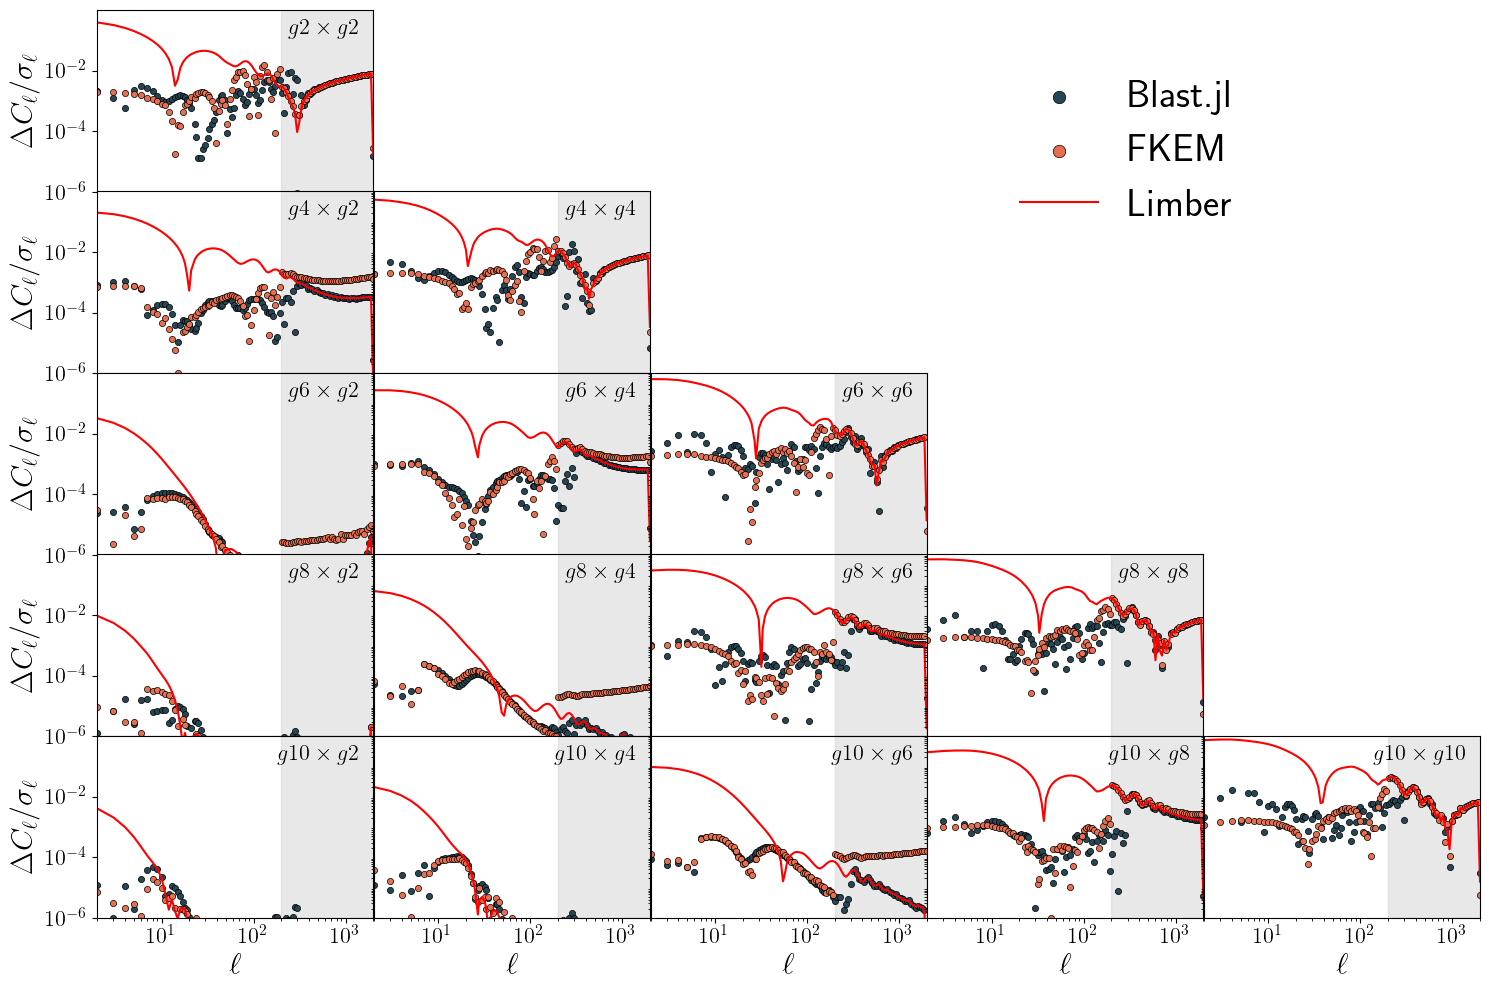

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(15, 10))

odd_indices = [1, 3, 5, 7, 9]

for i in range(5):
    for j in range(5):
        if j > i:  # Only plot the lower triangle, including diagonal
            fig.delaxes(axes[i, j])  # Remove the subplot if it's in the upper triangle
            continue
        
        ax = axes[i, j]
        data = m_CC[:, odd_indices[i], odd_indices[j]]
        data_fang = m_CC_fang[:, odd_indices[i], odd_indices[j]]
        data_limb = m_CC_limb[:, odd_indices[i], odd_indices[j]]

        # Change background color after x = 200
        ax.axvspan(200, ell.max(), color='lightgrey', alpha=0.5)

        if i == 0 and j == 0:
            ax.scatter(ell, data, label='Blast.jl', color = "#264653",s=20,edgecolors='black',linewidths=0.5)
            ax.scatter(ell, data_fang, label='FKEM', color= "#E76F51", s=20,edgecolors='black',linewidths=0.5)
            ax.plot(ell, data_limb, color='r', label='Limber')
        else:
            ax.scatter(ell, data, color = "#264653",s=20,edgecolors='black',linewidths=0.5)
            ax.scatter(ell, data_fang, color= "#E76F51", s=20,edgecolors='black',linewidths=0.5)
            ax.plot(ell, data_limb, color='r')

        ax.set_xscale('log')
        ax.set_yscale('log')  # Set the y-axis to log scale
        
        # Set the y-axis limits
        ax.set_ylim((1e-6, 9.9e-1))
        ax.set_xlim((2, 2000))
        
        # Add text identifying the two bins in the bottom-right corner
        ax.text(0.95, 0.95, fr'$g{odd_indices[i]+1} \times g{odd_indices[j]+1}$', transform=ax.transAxes,
                fontsize=16, verticalalignment='top', horizontalalignment='right')


        # Only set labels for the leftmost and bottom plots
        if j == 0:
            ax.set_ylabel(r'$\Delta C_\ell /\sigma_\ell$', fontsize=22)
            ax.tick_params(axis='y', labelsize=16)
        else:
            ax.set_yticks([])
            ax.set_yticklabels([])
        
        if i == 4:
            ax.set_xlabel(r'$\ell$', fontsize=22)
            ax.tick_params(axis='x', labelsize=16)
        else:
            ax.set_xticks([])
            ax.set_xticklabels([])

# Create a single legend slightly to the left and lower
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.95), fontsize=28, markerscale=2, frameon=False)

# Adjust layout for better viewing
plt.tight_layout(h_pad=-0.9, w_pad=-0.3)
plt.savefig("Plots/CC_F32.pdf")
plt.show()

# Stacked bar chart for timings

In [7]:
Nthreads64, t_fft64, t_ws64, t_cls64, t_tot64, errors64 = np.loadtxt("timings/time_vs_threads_symmetry_F64.txt", unpack = True)

In [8]:
xaxis64 = np.arange(7)[np.argsort(Nthreads64)]

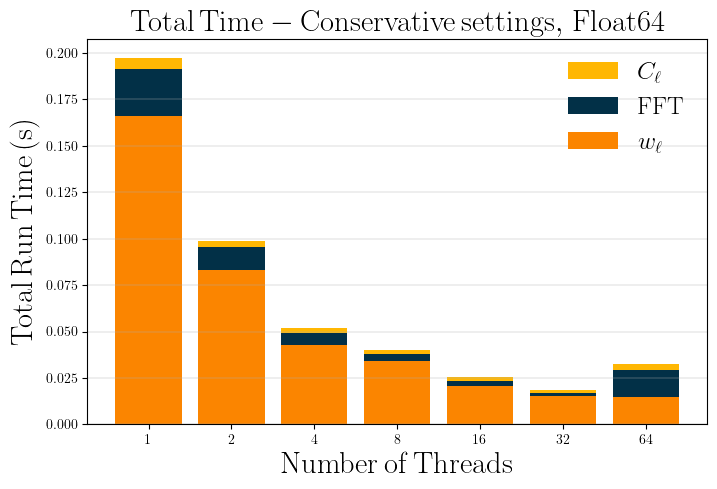

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the stacked bars
p3 = ax.bar(xaxis64, t_cls64, bottom=t_fft64 + t_ws64, label=r'$C_\ell$', capsize=5, color="#ffb703")
p1 = ax.bar(xaxis64, t_fft64, bottom=t_ws64,label=r'$\mathrm{FFT}$', capsize=5, color = "#023047")
p2 = ax.bar(xaxis64, t_ws64, label=r'$w_\ell$', capsize=5, color="#fb8500")

# Adding error bars for t_tot
#ax.errorbar(Nthreads, t_tot, yerr=errors, fmt='o', color='black')

# Labels and title
ax.set_xticks(range(len(Nthreads64)))
ax.set_xticklabels([r'$1$', r'$2$', r'$4$', r'$8$', r'$16$', r'$32$', r'$64$'])
ax.set_xlabel(r'$\mathrm{Number\, of\, Threads}$', fontsize = 22)
ax.set_ylabel(r'$\mathrm{Total\, Run\, Time\, (s)}$', fontsize = 22 )
ax.set_title(r'$\mathrm{Total\, Time - Conservative\, settings,\, Float64}$', fontsize = 22)
ax.grid(axis='y', linewidth=0.3)
ax.legend(frameon=False, fontsize=18)

fig.savefig("Plots/timings_symmetry_F64.pdf")

plt.show()

In [14]:
Nthreads, t_fft, t_ws, t_cls, t_tot, errors = np.loadtxt("timings/time_vs_threads_symmetry_F32.txt", unpack = True)

In [15]:
#xaxis = np.arange(7)[np.argsort(Nthreads)]
xaxis = [3,1,2,4,5,6,7]

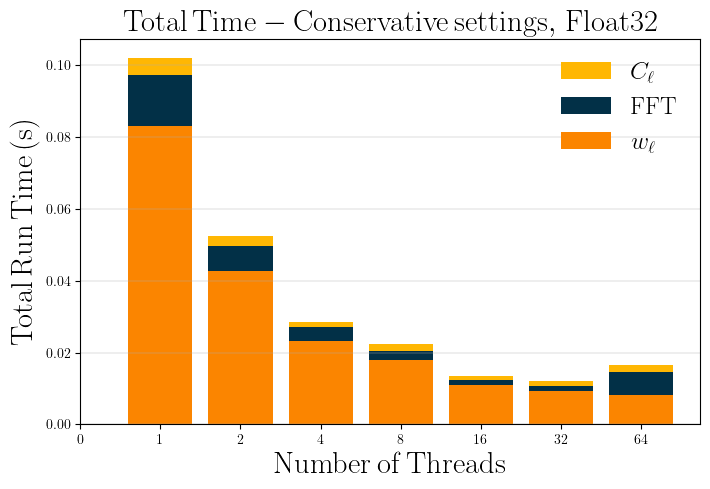

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the stacked bars
p3 = ax.bar(xaxis, t_cls, bottom=t_fft + t_ws, label=r'$C_\ell$', capsize=5, color="#ffb703")
p1 = ax.bar(xaxis, t_fft, bottom=t_ws,label=r'$\mathrm{FFT}$', capsize=5, color = "#023047")
p2 = ax.bar(xaxis, t_ws, label=r'$w_\ell$', capsize=5, color="#fb8500")

# Adding error bars for t_tot
#ax.errorbar(Nthreads, t_tot, yerr=errors, fmt='o', color='black')

# Labels and title
ax.set_xticks(range(len(Nthreads)+1))
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$4$', r'$8$', r'$16$', r'$32$', r'$64$'])
ax.set_xlabel(r'$\mathrm{Number\, of\, Threads}$', fontsize = 22)
ax.set_ylabel(r'$\mathrm{Total\, Run\, Time\, (s)}$', fontsize = 22 )
ax.set_title(r'$\mathrm{Total\, Time - Conservative\, settings,\, Float32}$', fontsize = 22)
ax.grid(axis='y', linewidth=0.3)
ax.legend(frameon=False, fontsize=18)
fig.savefig("Plots/timings_symmetry_F32.pdf")

plt.show()